In [94]:
import numpy as np
import sklearn
from sklearn.mixture import GaussianMixture
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt

In [16]:
sklearn.__version__

'1.2.0'

# Data
Let's initialize the dummy dataset

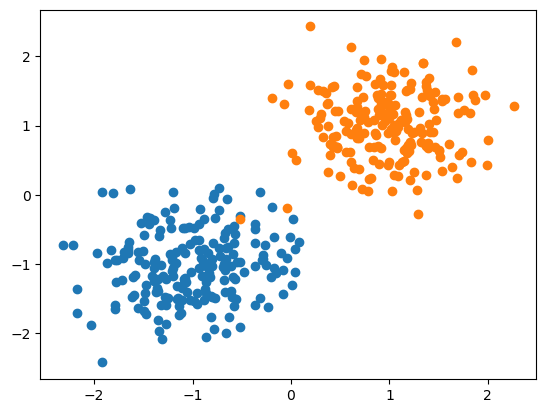

In [108]:
data1 = np.random.normal(loc=-1, scale=.5, size=(200, 2))
data2 = np.random.normal(loc=1, scale=.5, size=(200, 2))
#data1 = np.concatenate((data1, np.ones((200, 1))), axis=-1)
#data2 = np.concatenate((data2, np.zeros((200, 1))), axis=-1)

plt.scatter(data1[:, 0], data1[:, 1])
plt.scatter(data2[:, 0], data2[:, 1])

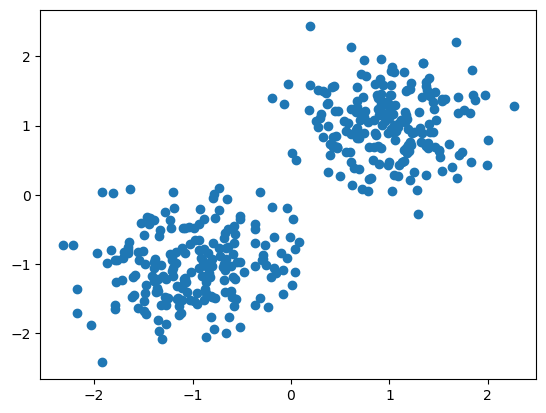

In [111]:
data = np.concatenate((data1, data2), axis=0)
plt.scatter(data[:, 0], data[:, 1])

In [112]:
data.shape

(400, 2)

# Clustering algorithms
We will now implement various types of clustering algorithms and keep in mind the advantages and weaknesses of various algorithms.

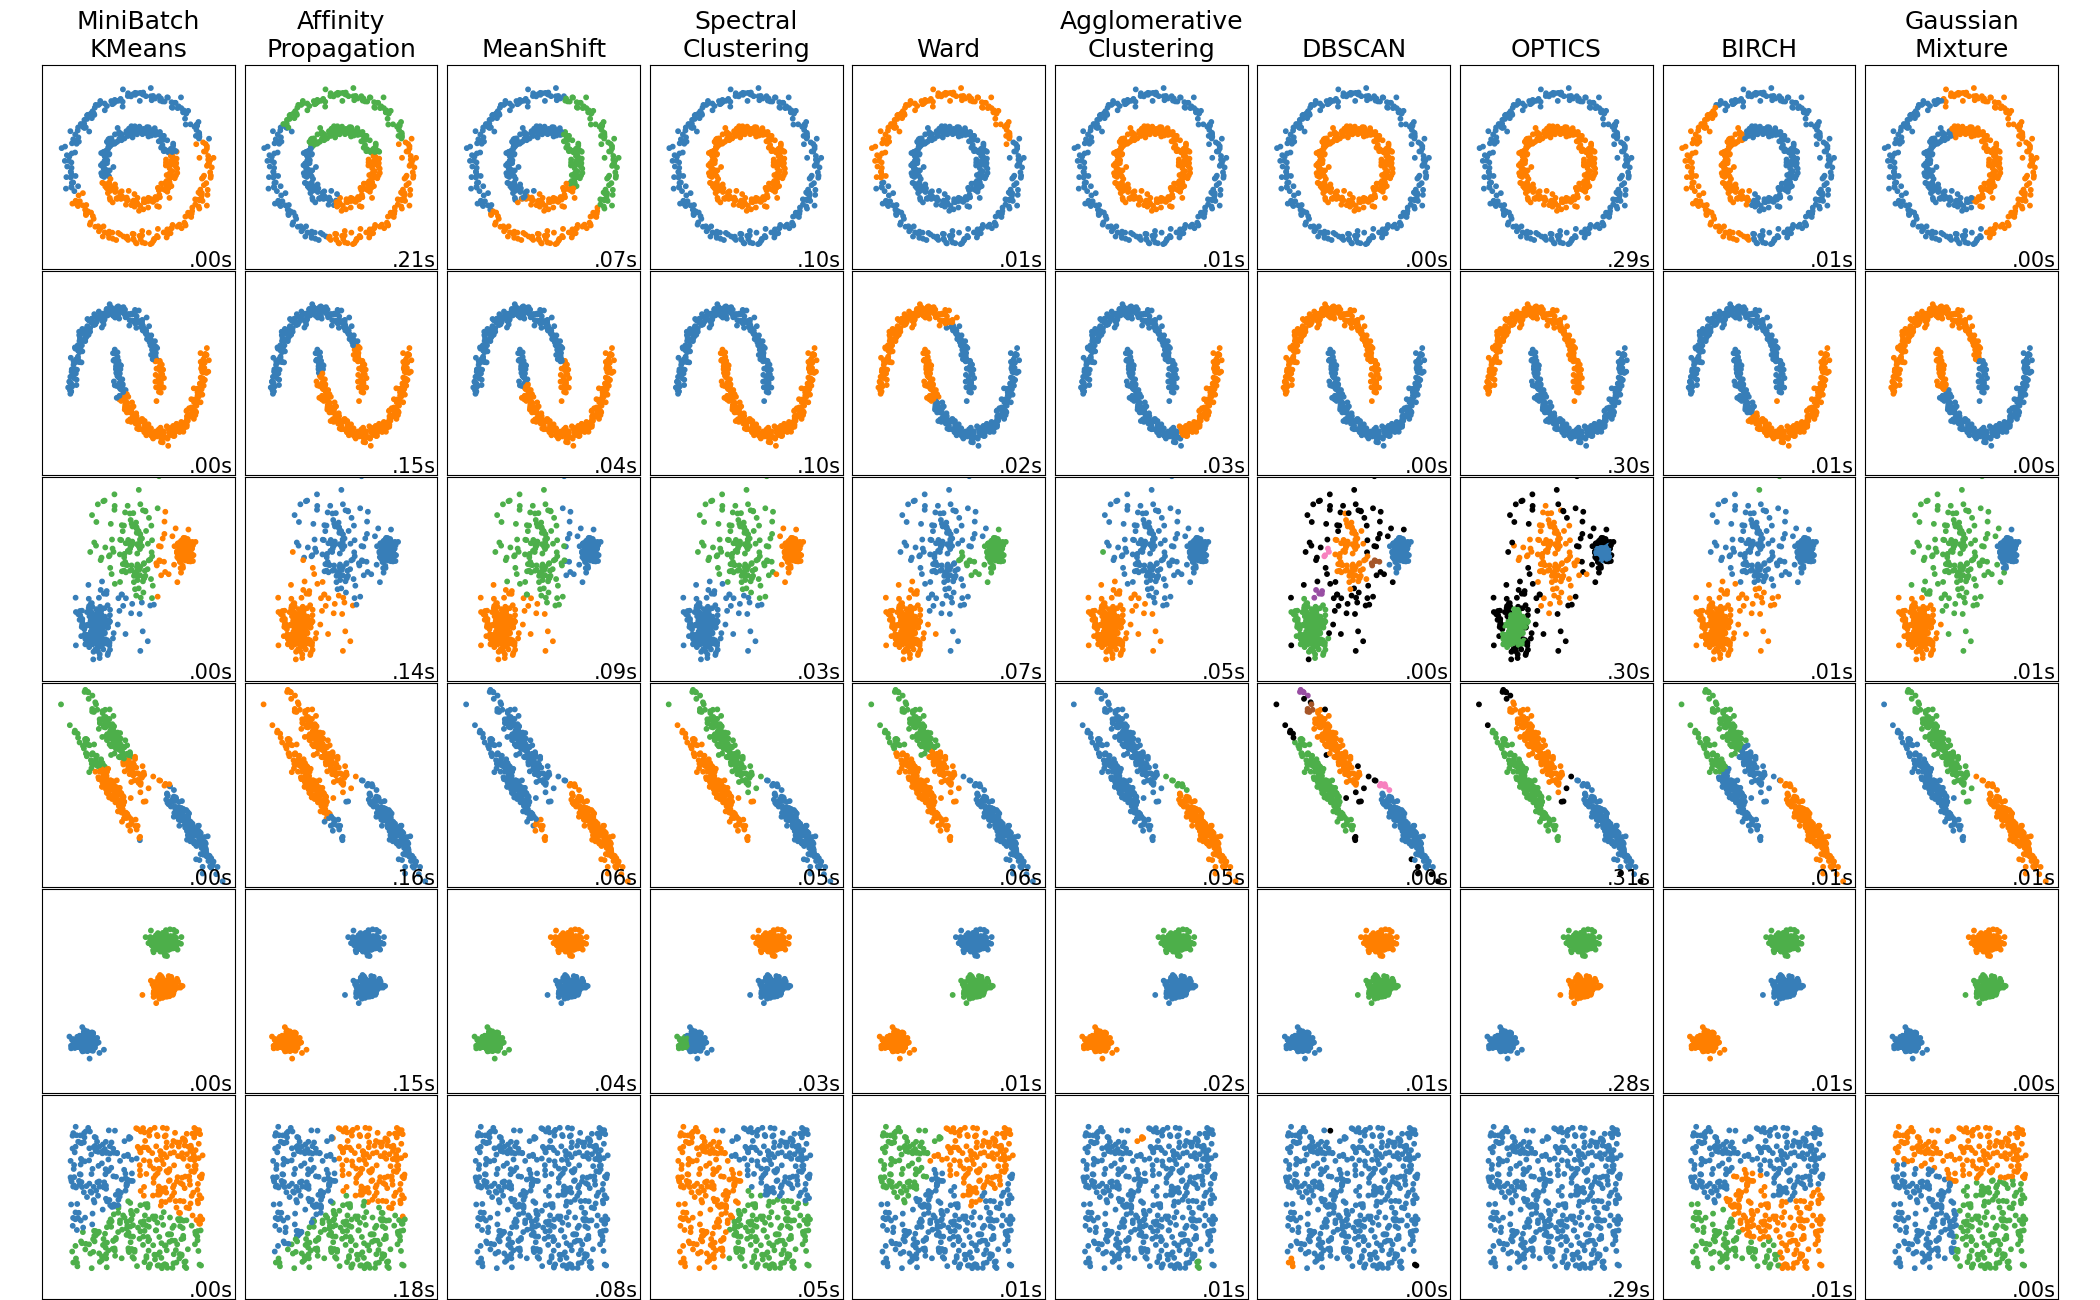

In [61]:
# Requires the shape tp be (number of elements, dimensions...)

def try_method(model, X):
    pred = model.fit_predict(X)
    plt.scatter(X[:, 0], X[:, 1], c=pred)
    return pred

## Requiring number of clusters

## K-Means

C:\Users\Vincent\anaconda3\envs\ai-robotics\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


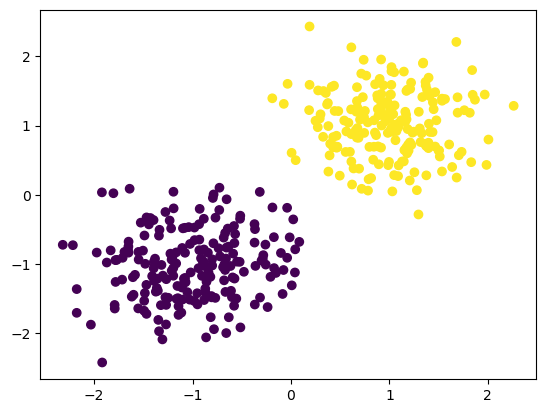

In [115]:
pred_km = try_method(sklearn.cluster.KMeans(2), data)

## Spectral clustering

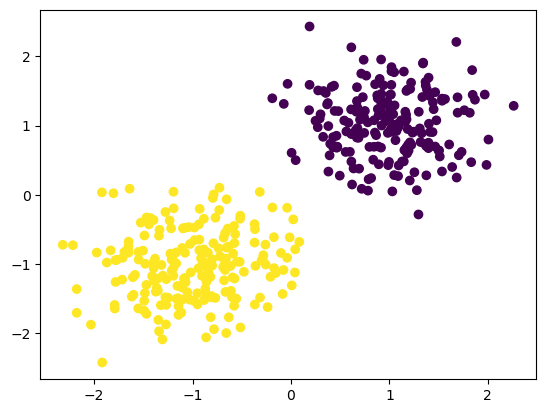

In [117]:
pred_sc = try_method(sklearn.cluster.SpectralClustering(2), data)

## Agglomerative Clustering

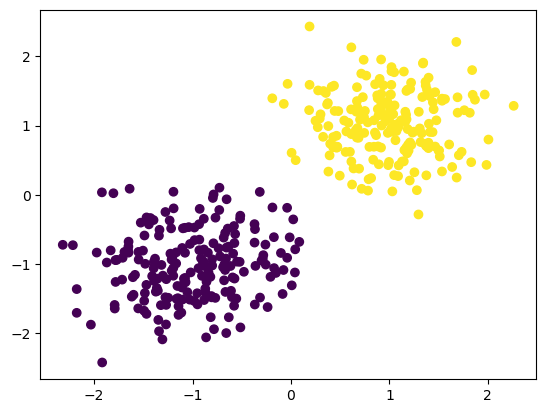

In [118]:
pred_ward = try_method(sklearn.cluster.AgglomerativeClustering(2), data)

### Birch

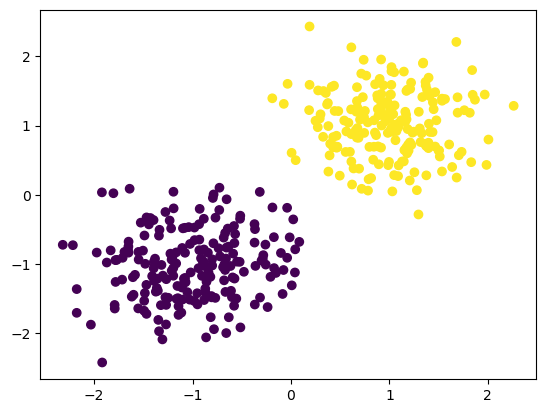

In [120]:
pred_birch = try_method(sklearn.cluster.Birch(n_clusters=2), data)

### Gaussian Mixture

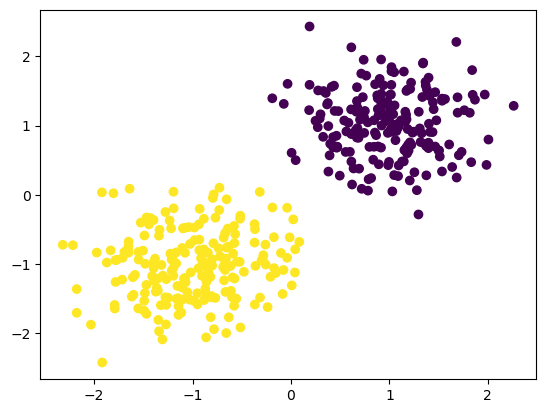

In [126]:
pred_gm = try_method(sklearn.mixture.GaussianMixture(n_components=2), data)

## Without knowing the number of clusters

### DBSCAN

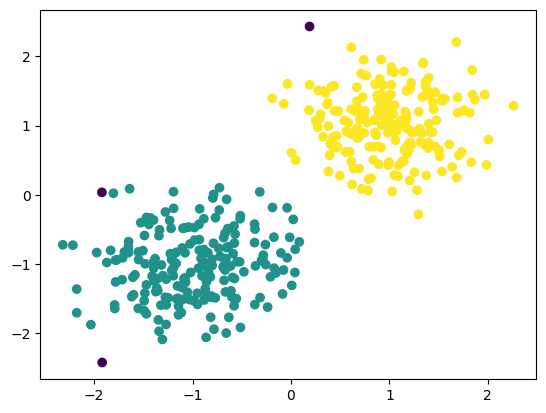

In [114]:
pred_dbscan = try_method(sklearn.cluster.DBSCAN(eps=0.50, min_samples=9), data)

### MeanShift

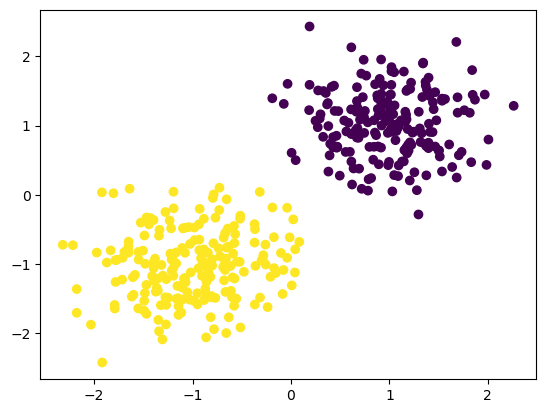

In [116]:
pred_ms = try_method(sklearn.cluster.MeanShift(), data)

### OPTICS

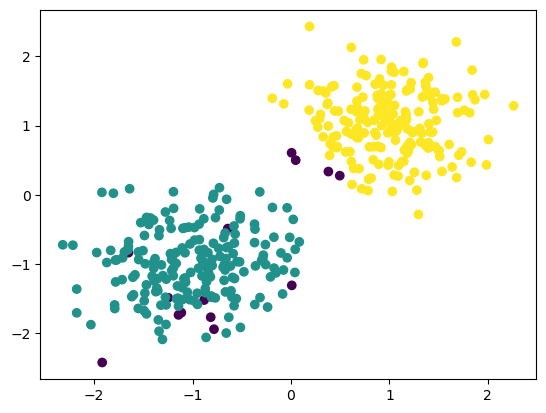

In [119]:
pred_optics = try_method(sklearn.cluster.OPTICS(min_samples=.45, max_eps=np.inf, metric='minkowski'), data)

### Affinity Propagation

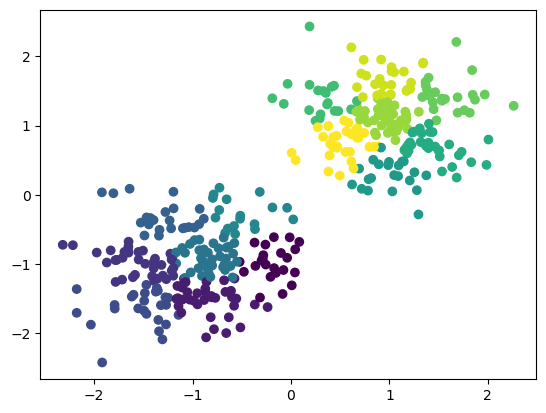

In [113]:
pred_ap = try_method(sklearn.cluster.AffinityPropagation(damping=0.7), data)

## PCA

In [122]:
pca = sklearn.decomposition.PCA(n_components = 2)
pca.fit(data)
pca.explained_variance_ratio_

array([0.91127756, 0.08872244])

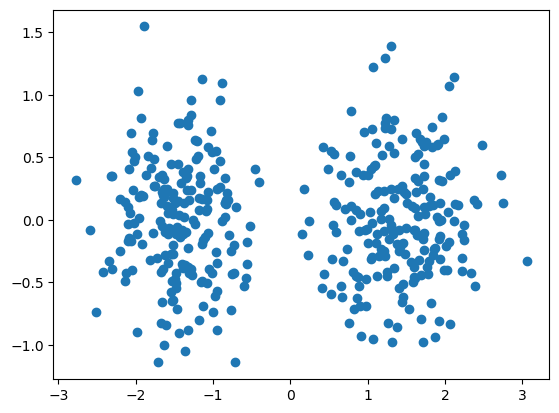

In [124]:
new_data = pca.transform(data)
plt.scatter(new_data[:, 0], new_data[:, 1])

# Ideas

- T-SNE (for data exploration like PCA)
- Self-organizing Maps (SOM) for clustering: https://youtu.be/lFbxTlD5R98?t=2497